In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [2]:
df = pd.DataFrame(
    [
        ["Yes", "Single", 125, "No"],
        ["No", "Married", 100, "No"],
        ["No", "Single", 70, "No"],
        ["Yes", "Married", 120, "No"],
        ["No", "Divorced", 95, "Yes"],
        ["No", "Married", 60, "No"],
        ["Yes", "Divorced", 220, "No"],
        ["No", "Single", 85, "Yes"],
        ["No", "Married", 75, "No"],
        ["No", "Single", 90, "Yes"]
    ],
    columns=["Refund", "Martial Status", "Taxable Income", "Cheat"]
)
df

,Refund,Martial Status,Taxable Income,Cheat
0,Yes,Single,125,No
1,No,Married,100,No
2,No,Single,70,No
3,Yes,Married,120,No
4,No,Divorced,95,Yes
5,No,Married,60,No
6,Yes,Divorced,220,No
7,No,Single,85,Yes
8,No,Married,75,No
9,No,Single,90,Yes


In [3]:
X = df[["Refund", "Martial Status", "Taxable Income"]]
Y = df[["Cheat"]]

In [4]:
lb = LabelEncoder()
X.Refund = pd.Series(lb.fit_transform(X.Refund))
X["Martial Status"] = pd.Series(lb.fit_transform(X["Martial Status"]))
# X["Taxable Income"] = pd.Series(lb.fit_transform(X["Taxable Income"]))
Y["Cheat"] = pd.Series(lb.fit_transform(Y["Cheat"]))

C:\Users\Ishaan\AppData\Local\Temp\ipykernel_18160\3853951810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Refund = pd.Series(lb.fit_transform(X.Refund))
C:\Users\Ishaan\AppData\Local\Temp\ipykernel_18160\3853951810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Martial Status"] = pd.Series(lb.fit_transform(X["Martial Status"]))
C:\Users\Ishaan\AppData\Local\Temp\ipykernel_18160\3853951810.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [5]:
X

,Refund,Martial Status,Taxable Income
0,1,2,125
1,0,1,100
2,0,2,70
3,1,1,120
4,0,0,95
5,0,1,60
6,1,0,220
7,0,2,85
8,0,1,75
9,0,2,90


In [8]:
Y

,Cheat
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,1
8,0
9,1


In [6]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

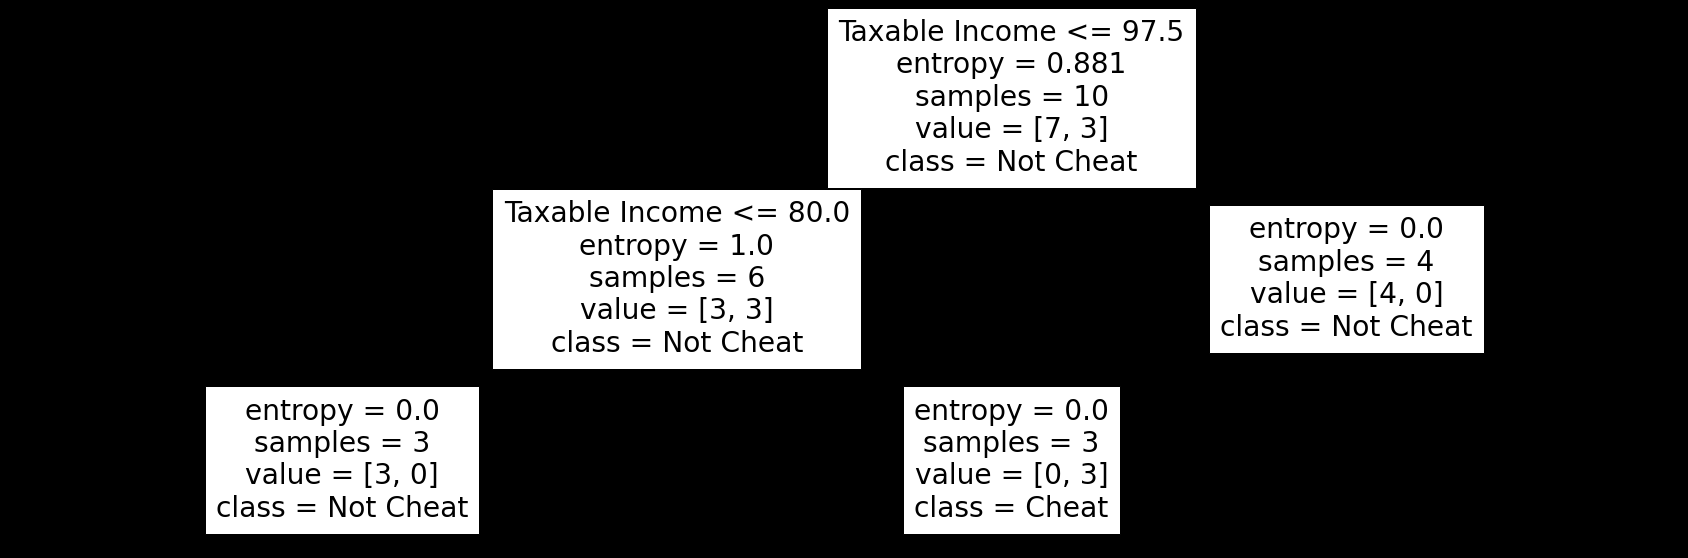

In [7]:
plt.figure(figsize=(30,10), facecolor ='k')
tree.plot_tree(clf, class_names=['Not Cheat', 'Cheat'], feature_names=X.columns)
plt.show()